In [68]:
import numpy as np
import math
import matplotlib.pyplot as plt


#### Ex 1.1
Implementation of the method proposed of linear regression

Here we are computing the initial set of points.

In [69]:

x = np.linspace(-10,10,100)
m = [0.,0.]
angle = 45*math.pi/180
print(angle)
rot = np.array([[math.cos(angle), -math.sin(angle)], [math.sin(angle),
math.cos(angle)]])
lamb = np.array([[100,0],[0,1]])
s = np.matmul(rot, np.matmul(lamb, rot.transpose()))
points = np.random.multivariate_normal(m,s,100)

0.7853981633974483


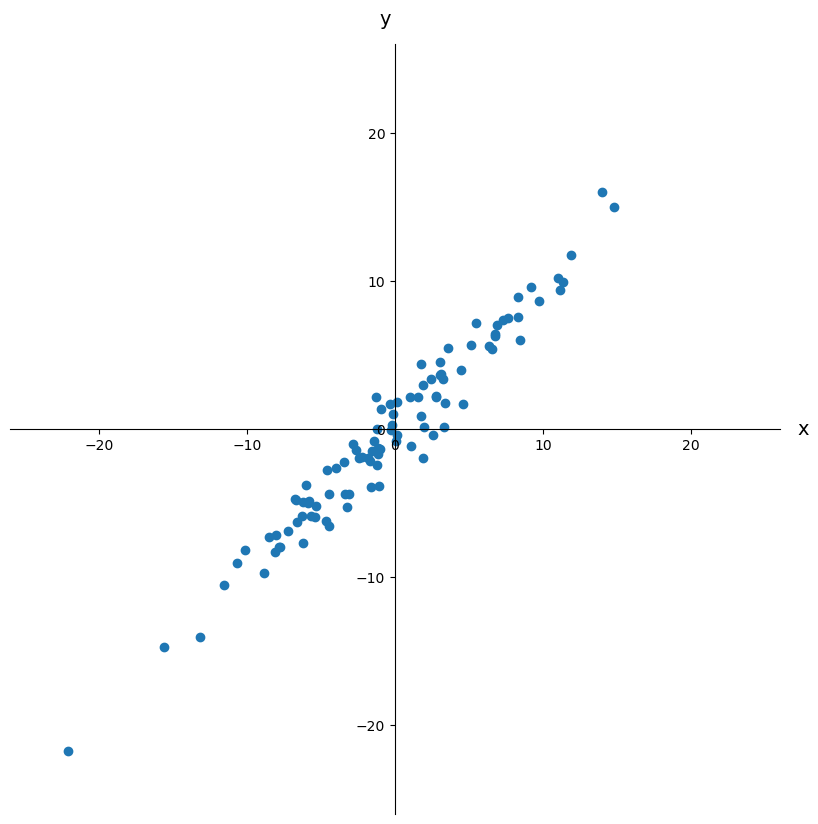

In [70]:
import numpy as np                 # v 1.19.2
import matplotlib.pyplot as plt    # v 3.3.2

# Enter x and y coordinates of points and colors
xs = points[:,0]
ys = points[:,1]

# Select length of axes and the space between tick labels
xmin, xmax, ymin, ymax = -25, 25, -25, 25
ticks_frequency = 1

# Plot points
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(xs, ys)


# Set identical scales for both axes
ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')

# Set bottom and left spines as x and y axes of coordinate system
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create 'x' and 'y' labels placed at the end of the axes
ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)



plt.show()

These are the points that we will work through this first exercise.

In [71]:
def mse(y, y_hat):
    y = np.array(y)
    y_hat = np.array(y_hat)
    differences = np.subtract(y, y_hat)
    squared_differences = np.square(differences)
    return squared_differences.mean()

In [72]:
def function_2(W,X):
  return W

def gradf_2(W,X):
    y= []
    y_hat = []
    for point in X:
        predict = W[0]*point[0]+W[1]
        y_hat.append(predict)
        y.append(point[1])
    y = np.array(y)
    y_hat = np.array(y_hat)
    differences = np.subtract(y_hat, y)
    return np.array([ np.sum(np.multiply(differences,X[:,0])),np.sum(differences) ])


def back_prop(W,X,w_history,alpha = 0.0001,iter=0):
    w_history.append(W)
    W = np.subtract(W,np.multiply(alpha ,gradf_2(W,X)))
    if iter>1000:
        w_history.append(W)
        return [len(w_history)-1, w_history]
    else:
        res = back_prop(W,X, w_history,iter=iter+1)

    return res

In [73]:

itera, w_h = back_prop(np.array([3, 10]),points, [])
print(f"{itera} iterations were needed to converge to {w_h[-1]}")

1002 iterations were needed to converge to [0.96439445 0.02495456]


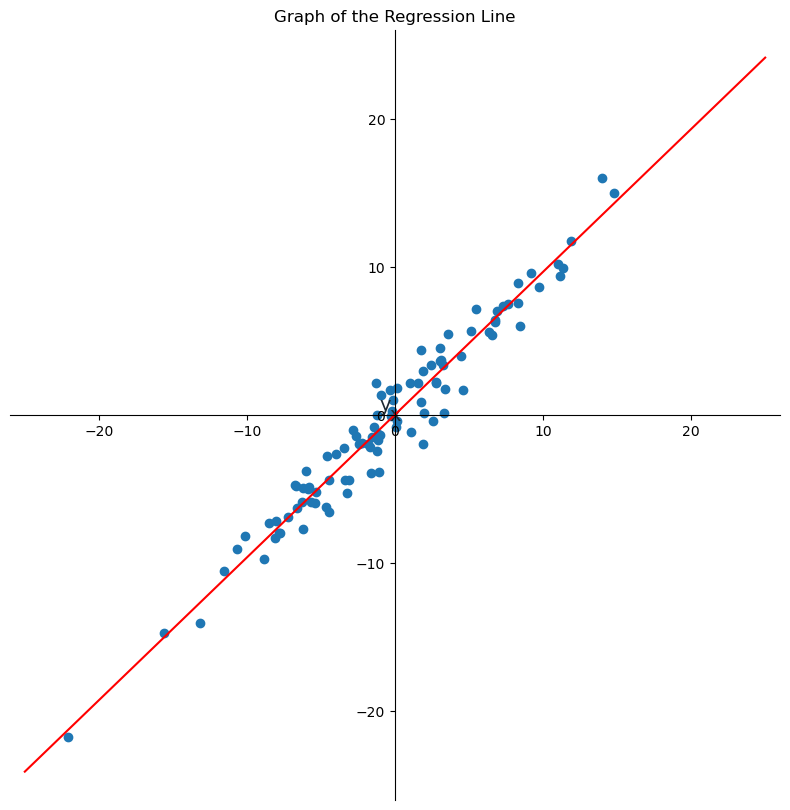

In [74]:
import numpy as np                 # v 1.19.2
import matplotlib.pyplot as plt    # v 3.3.2

# Enter x and y coordinates of points and colors
xs = points[:,0]
ys = points[:,1]

# Select length of axes and the space between tick labels
xmin, xmax, ymin, ymax = -25, 25, -25, 25
ticks_frequency = 1

# Plot points
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(xs, ys)


# Set identical scales for both axes
ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')

# Set bottom and left spines as x and y axes of coordinate system
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create 'x' and 'y' labels placed at the end of the axes
ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)

#create regression line


x = np. linspace(-25,25,100)
y = w_h[-1][0]*x+w_h[-1][1]
plt. plot(x, y, '-r', label='y=2x+1')
plt. title('Graph of the Regression Line')
plt. xlabel('x', color='#1C2833')
plt. ylabel('y', color='#1C2833')



plt.show()

The red line is the regression line that resulted from the gradient descent algorithm. We can see that it goes through the blue points at the correct angle, thus the algorithm computed the line correctly.

### Ex1.2

The aim of this exercise is to show the power of outlier points. To show this, we will change the coordinates of a point to (-40,20).


In [75]:
points[1]=[-40,20]
itera, w_h = back_prop(np.array([3, 10]),points, [])
print(f"{itera} iterations were needed to converge to {w_h[-1]}")

1002 iterations were needed to converge to [0.60560977 0.41025515]


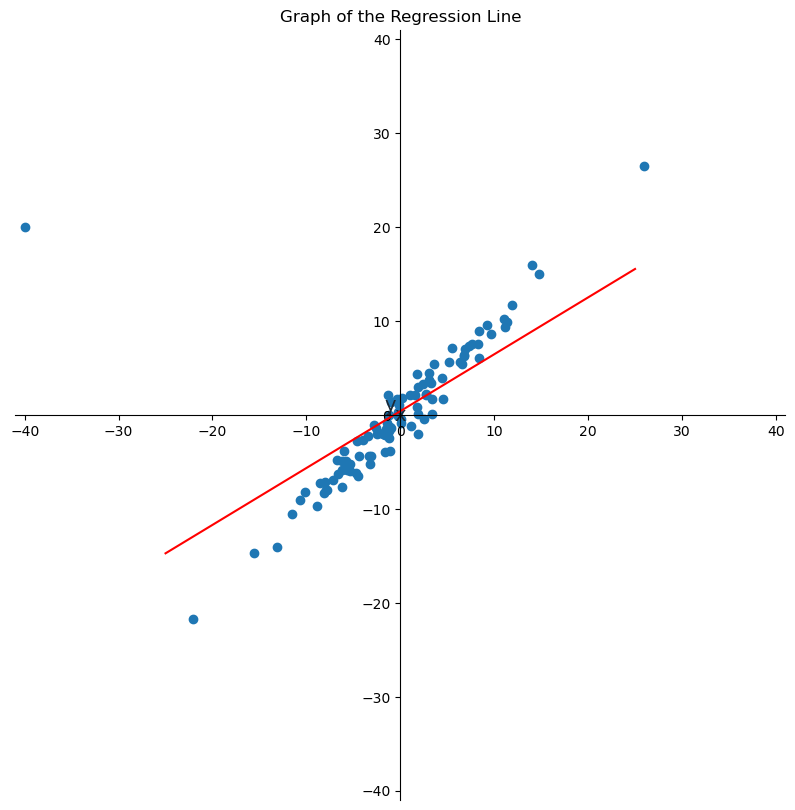

In [76]:
import numpy as np                 # v 1.19.2
import matplotlib.pyplot as plt    # v 3.3.2

# Enter x and y coordinates of points and colors
xs = points[:,0]
ys = points[:,1]

# Select length of axes and the space between tick labels
xmin, xmax, ymin, ymax = -40, 40, -40, 40
ticks_frequency = 1

# Plot points
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(xs, ys)


# Set identical scales for both axes
ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')

# Set bottom and left spines as x and y axes of coordinate system
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create 'x' and 'y' labels placed at the end of the axes
ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)

#create regression line


x = np. linspace(-25,25,100)
y = w_h[-1][0]*x+w_h[-1][1]
plt. plot(x, y, '-r', label='y=2x+1')
plt. title('Graph of the Regression Line')
plt. xlabel('x', color='#1C2833')
plt. ylabel('y', color='#1C2833')



plt.show()

We can quite easily observe that the line is a bit to up than it should be, thus the impact of one outlier can be seen.

Now, to further showcase the impact of the outlier points, we will change 3 other points to the following values
(-41,40)
(30,50)
(-10,40)

In [77]:
points[1]=[-41,40]
points[2]=[30,50]
points[3]=[-10,40]

itera, w_h = back_prop(np.array([3, 10]),points, [])
print(f"{itera} iterations were needed to converge to {w_h[-1]}")

1002 iterations were needed to converge to [0.55741409 1.39700945]


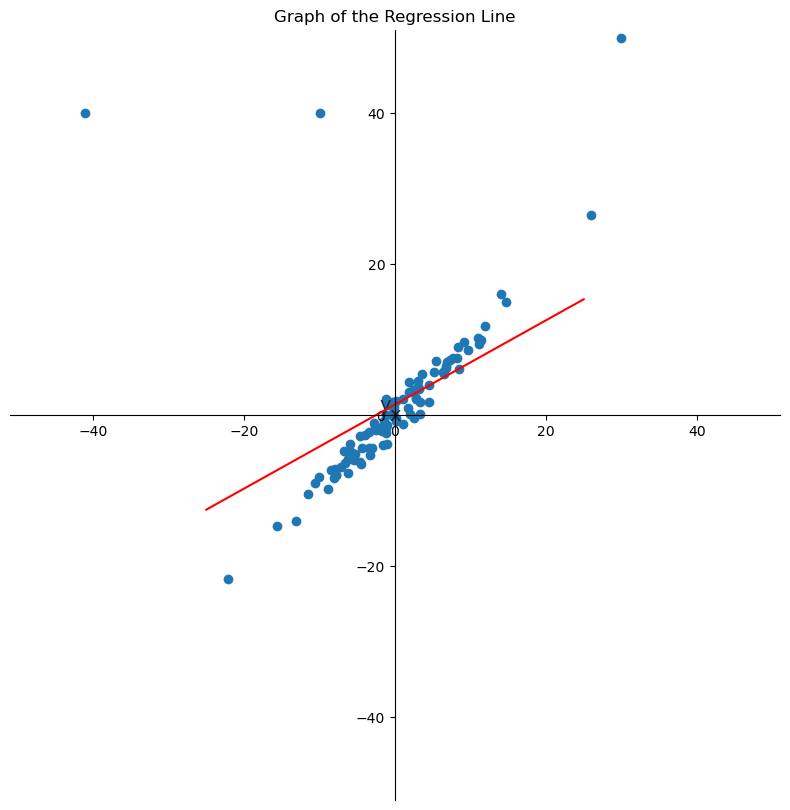

In [78]:
import numpy as np                 # v 1.19.2
import matplotlib.pyplot as plt    # v 3.3.2

# Enter x and y coordinates of points and colors
xs = points[:,0]
ys = points[:,1]

# Select length of axes and the space between tick labels
xmin, xmax, ymin, ymax = -50, 50, -50, 50
ticks_frequency = 1

# Plot points
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(xs, ys)


# Set identical scales for both axes
ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')

# Set bottom and left spines as x and y axes of coordinate system
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create 'x' and 'y' labels placed at the end of the axes
ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)

#create regression line


x = np. linspace(-25,25,100)
y = w_h[-1][0]*x+w_h[-1][1]
plt. plot(x, y, '-r', label='y=2x+1')
plt. title('Graph of the Regression Line')
plt. xlabel('x', color='#1C2833')
plt. ylabel('y', color='#1C2833')



plt.show()

We can very easily note that the magnitude by which those 3 points changed our regression line is huge. The importance of catching outliers is thus shown.
